## Importing Required Libraries

In [0]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

##  Taking Model Parameters and Hyperparameters

In [0]:
input_size=784
num_class=10
no_epoch=5
batch_size=64
lr=0.01

## Downloading FashionMNIST dataset and transforming all images  into tensor

In [0]:
train=torchvision.datasets.FashionMNIST('./input',train=True,download=True,transform=transforms.ToTensor())
test=torchvision.datasets.FashionMNIST('./input',train=False,download=True,transform=transforms.ToTensor())

                                       

In [21]:
print('No. of samples in train set: '+str(len(train)))
print('No. of samples in test set: '+str(len(test)))

No. of samples in train set: 60000
No. of samples in test set: 10000


In [50]:
img=train[2007][0]
img.size()

torch.Size([1, 28, 28])

## Plotting image of random sample from training images

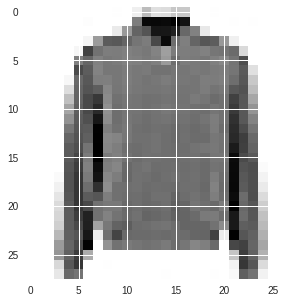

In [51]:
plt.figure(figsize=(10,5))
plt.imshow(img.reshape(28,28))

##  Creating DataLoader for Train and Testing images 

In [0]:
train_loader=torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=False)

###  Defining Model as Linear summation of all inputs and taking softmax as output 
### Loss function is CrossEntropy as it is classification problem
### taking our optimiztion algorithm to be stochastic gradient descent

In [0]:
model=nn.Linear(input_size,num_class)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

### initialized weights of model

In [63]:
print(model.weight.size())
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0190, -0.0155,  0.0024,  ...,  0.0110, -0.0140, -0.0144],
        [-0.0023, -0.0149,  0.0232,  ...,  0.0304,  0.0237, -0.0014],
        [ 0.0044, -0.0152,  0.0041,  ...,  0.0270,  0.0167,  0.0339],
        ...,
        [-0.0044,  0.0270,  0.0206,  ...,  0.0066, -0.0224,  0.0250],
        [ 0.0219, -0.0355, -0.0207,  ..., -0.0010,  0.0037, -0.0319],
        [ 0.0175, -0.0030,  0.0218,  ..., -0.0291, -0.0258,  0.0090]],
       requires_grad=True)


### Initialized biases of model

In [64]:
print(model.bias.size())
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([-0.0155,  0.0031,  0.0074,  0.0217, -0.0228, -0.0062,  0.0271,  0.0232,
        -0.0058, -0.0313], requires_grad=True)


In [65]:
total_step=len(train_loader)
total_step

938

## Training of model on training dataset

In [84]:
for epoch in range(no_epoch):
  for i,(images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28)
    
    pred=model(images)
    loss=criterion(pred,labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % 100 == 0:
      
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, no_epoch, i+1, total_step, loss.item()))
           

Epoch [1/5], Step [100/938], Loss: 0.5618
Epoch [1/5], Step [200/938], Loss: 0.4682
Epoch [1/5], Step [300/938], Loss: 0.7252
Epoch [1/5], Step [400/938], Loss: 0.5417
Epoch [1/5], Step [500/938], Loss: 0.4914
Epoch [1/5], Step [600/938], Loss: 0.4580
Epoch [1/5], Step [700/938], Loss: 0.6543
Epoch [1/5], Step [800/938], Loss: 0.5727
Epoch [1/5], Step [900/938], Loss: 0.5844
Epoch [2/5], Step [100/938], Loss: 0.5242
Epoch [2/5], Step [200/938], Loss: 0.5473
Epoch [2/5], Step [300/938], Loss: 0.5859
Epoch [2/5], Step [400/938], Loss: 0.4740
Epoch [2/5], Step [500/938], Loss: 0.5689
Epoch [2/5], Step [600/938], Loss: 0.6264
Epoch [2/5], Step [700/938], Loss: 0.4190
Epoch [2/5], Step [800/938], Loss: 0.3545
Epoch [2/5], Step [900/938], Loss: 0.3271
Epoch [3/5], Step [100/938], Loss: 0.4157
Epoch [3/5], Step [200/938], Loss: 0.6724
Epoch [3/5], Step [300/938], Loss: 0.5006
Epoch [3/5], Step [400/938], Loss: 0.5939
Epoch [3/5], Step [500/938], Loss: 0.6007
Epoch [3/5], Step [600/938], Loss:

## Testing of model and get accuracy 

In [85]:
with torch.no_grad():
  correct=0
  total=0
  for (images,labels) in test_loader:
    images=images.reshape(-1,28*28)
    test_pred=model(images)
    _, predicted = torch.max(test_pred.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
  print('Accuracy of the model on the 10000 test images: {:.4f} %'.format(100 * correct / total)) 

Accuracy of the model on the 10000 test images: 82.0000 %


### looking at last loop values during testing

In [86]:
correct

tensor(8245)

In [87]:
predicted

tensor([3, 6, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5])

In [80]:
labels

tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5])

In [88]:
print(test_pred.size())
print(test_pred)

torch.Size([16, 10])
tensor([[ 3.2600,  0.4748, -0.9016,  5.6064,  0.4831, -5.4681,  1.5290, -2.9937,
          0.5697, -2.7697],
        [ 1.5648,  2.2307,  1.3192,  1.5371,  0.7073, -4.2182,  2.4052, -2.3944,
         -1.0804, -1.6968],
        [-4.3042, -3.4763, -2.6839, -2.4562, -2.0306,  4.4913, -2.6280,  8.1340,
          1.4736,  3.2493],
        [-0.7662, -2.3195, -1.2026, -1.9067, -1.9629,  6.6524, -1.6127,  0.1670,
          1.7074,  1.0039],
        [-2.1959, -3.2591, -0.1653, -2.9849, -1.1419,  1.9212,  0.0037,  1.5003,
          6.0292,  0.3696],
        [-0.0195, -0.4667,  5.5476,  1.4982,  4.9399, -3.4278,  3.8900, -6.4963,
         -0.3119, -5.1007],
        [ 0.8565, -1.9868, -1.5385, -2.4111, -3.0114,  8.2600, -0.1556, -2.3864,
         -1.0567,  3.0901],
        [ 2.3477, -0.1679,  3.3803,  0.9364,  2.0091, -2.4552,  3.8501, -5.3421,
         -0.5165, -4.3494],
        [-1.7313, -3.8683,  0.4177,  0.9123,  0.8410,  0.5729,  0.6010, -1.8710,
          6.1591, -3.1143]